In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

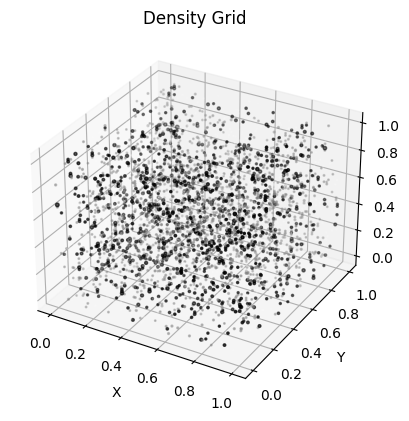

In [58]:
with open("../data/density_grid.json", "r") as f:
    data = json.load(f)

densities = np.array(data["density_grid"])
x_coordinates, y_coordinates, z_coordinates = np.meshgrid(
    np.linspace(0, 1, densities.shape[0]),
    np.linspace(0, 1, densities.shape[1]),
    np.linspace(0, 1, densities.shape[2])
)
x_coordinates = x_coordinates.flatten()
y_coordinates = y_coordinates.flatten()
z_coordinates = z_coordinates.flatten()
flat_densities = densities.flatten()
level1 = np.repeat(np.expand_dims(np.array([1, 1, 1, 0.3]), axis=0), flat_densities.shape[0], axis=0)
level2 = np.repeat(np.expand_dims(np.array([0.5, 0.5, 0.5, 0.6]), axis=0), flat_densities.shape[0], axis=0)
level3 = np.repeat(np.expand_dims(np.array([0, 0, 0, 0.9]), axis=0), flat_densities.shape[0], axis=0)
colors = np.where(np.expand_dims(flat_densities, axis=-1) > 1, level2, level1)
colors = np.where(np.expand_dims(flat_densities, axis=-1) > 2, level3, colors)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x_coordinates, y_coordinates, z_coordinates, c=colors, s=flat_densities*1)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Density Grid")
plt.show()